In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Soal Ujian Module 2 Purwadhika

### 1. Import the libraries (pandas,numpy, matplotlib.pyplot, seaborn, math)

#### Use random.seed(101)

In [2]:
np.random.seed(101)

### 2. Load Titanic Dataset from Seaborn and show the .head() of the dataset

### Answer

In [3]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 3. Show the info of the dataframe using .info()

### Answer

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


### 4. Describe the dataframe using .describe()

In [5]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 5. Make Table like this to describe the dataframe

#### Columns Explanations :
 - __dataFeatures__ = column name
 - __dataType__ = data type of that column
 - __null__ = how many null data in that column/series
 - __nullPct__ = null percentage of total data in that column
 - __unique__ = how many unique data
 - __uniqueSample__ = get some unique sample from each column

#### hint : search .sample(), .drop_duplicates(), .values, .isna(), dtype

In [6]:
listdf = []
for indx in df.columns:
    lst = []
    lst.append(indx) 
    lst.append(df[indx].dtypes)
    lst.append(df[indx].isna().sum())
    lst.append((((df[indx].isna().sum()/891))*100))
    lst.append(df[indx].nunique())
    lst.append(list(df[indx].sample(n=2)))
    listdf.append(lst)   

In [7]:
df1 = pd.DataFrame(listdf, columns = ['dataFeatures','dataType','null','nullpct','unique', 'uniqueSample'])
df1

,dataFeatures,dataType,null,nullpct,unique,uniqueSample
0,survived,int64,0,0.000000,2,"[0, 1]"
1,pclass,int64,0,0.000000,3,"[1, 2]"
2,sex,object,0,0.000000,2,"[female, male]"
3,age,float64,177,19.865320,88,"[16.0, 24.0]"
4,sibsp,int64,0,0.000000,7,"[0, 0]"
5,parch,int64,0,0.000000,7,"[1, 0]"
6,fare,float64,0,0.000000,248,"[24.15, 18.0]"
7,embarked,object,2,0.224467,3,"[S, C]"
8,class,category,0,0.000000,3,"[Third, Third]"
9,who,object,0,0.000000,3,"[man, woman]"


In [8]:
list(df['age'].sample(n =2))

[51.0, 20.0]

In [9]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 6. Groupby

_Group By Sex (Mean)_

In [10]:
df.groupby(['sex']).mean()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305


_Group By Sex (standard deviation)_

In [11]:
df.groupby(['sex']).std()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.438211,0.85729,14.110146,1.156520,1.022846,57.997698,0.000000,0.490939
male,0.391775,0.81358,14.678201,1.061811,0.612294,43.138263,0.254225,0.453081


_Group By Sex (Minimum value)_

In [12]:
df.groupby(['sex']).min()

,survived,pclass,age,sibsp,parch,fare,who,adult_male,alive,alone
sex,,,,,,,,,,
female,0,1,0.75,0,0,6.75,child,False,no,False
male,0,1,0.42,0,0,0.00,child,False,no,False


_Group By Sex (Maximum value)_

In [13]:
df.groupby(['sex']).max()

,survived,pclass,age,sibsp,parch,fare,who,adult_male,alive,alone
sex,,,,,,,,,,
female,1,3,63.0,8,6,512.3292,woman,False,yes,True
male,1,3,80.0,8,5,512.3292,man,True,yes,True


_Group By Sex (Count)_

In [14]:
df.groupby(['sex']).count()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
sex,,,,,,,,,,,,,,
female,314,314,261,314,314,314,312,314,314,314,97,312,314,314
male,577,577,453,577,577,577,577,577,577,577,106,577,577,577


_Group By Sex (Describe Transpose)_

In [15]:
df.groupby(['sex']).describe().transpose()

sex                 female        male
age      count  261.000000  453.000000
         mean    27.915709   30.726645
         std     14.110146   14.678201
         min      0.750000    0.420000
         25%     18.000000   21.000000
         50%     27.000000   29.000000
         75%     37.000000   39.000000
         max     63.000000   80.000000
fare     count  314.000000  577.000000
         mean    44.479818   25.523893
         std     57.997698   43.138263
         min      6.750000    0.000000
         25%     12.071875    7.895800
         50%     23.000000   10.500000
         75%     55.000000   26.550000
         max    512.329200  512.329200
parch    count  314.000000  577.000000
         mean     0.649682    0.235702
         std      1.022846    0.612294
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    0.000000
         75%      1.000000    0.000000
         max      6.000000    5.000000
pclass   count  314.000000  577.000000
         mean     2.159236    2.389948
         std      0.857290    0.813580
         min      1.000000    1.000000
         25%      1.000000    2.000000
         50%      2.000000    3.000000
         75%      3.000000    3.000000
         max      3.000000    3.000000
sibsp    count  314.000000  577.000000
         mean     0.694268    0.429809
         std      1.156520    1.061811
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    0.000000
         75%      1.000000    0.000000
         max      8.000000    8.000000
survived count  314.000000  577.000000
         mean     0.742038    0.188908
         std      0.438211    0.391775
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      1.000000    0.000000
         75%      1.000000    0.000000
         max      1.000000    1.000000

### 7. Filter

#### Berapa banyak jumlah datanya kalau datanya cuma class = First dan class = Third ?

#### Berapa mean umur pria dari campuran class First dan Third?

#### lalu munculkan 5 data teratas dari filter tersebut dan cuma kolom sex dan age aja yang muncul

In [16]:
#Sum Data
classData = df[(df['class'] == 'First') | (df['class'] == 'Third')].count()['sex']
print('Jumlah Data: ' + str(classData))

#Avg Sex == male
classDatamale = df[((df['class'] == 'First') | (df['class'] == 'Third')) & (df['sex'] == 'male')].mean()['age']
print('Mean Umur Pria: ' + str(classDatamale))

#DataFrame
dfSexAge = df.head()[['sex', 'age']]
dfSexAge

Jumlah Data: 707
Mean Umur Pria: 30.72271186440678


,sex,age
0,male,22.0
1,female,38.0
2,female,26.0
3,female,35.0
4,male,35.0


#### Berapa total fare dari penumpang yang second class dan sendirian?

In [17]:
df[(df['class'] == 'Second') & (df['alone'] == True) ].sum()['fare']

1462.875

### 8. Missing Values
#### Berapa banyak NaN age data dan mean dari setiap who?
#### Isi data NaN dari kolom age dengan mean dari umur tergantung whonya dia apa (child/woman/man)
#### Kemudian print banyak NaN age data dan mean umur setiap who lagi.
#### Lalu ubah tipe column age menjadi int64

In [18]:
manNan = df[df['who'] == 'man'].isnull().sum()['age']
womanNan = df[df['who'] == 'woman'].isnull().sum()['age']
childNan = df[df['who'] == 'child'].isnull().sum()['age']

manMean = df[df['who'] == 'man'].mean()['age']
womanMean = df[df['who'] == 'woman'].mean()['age']
childMean = df[df['who'] == 'child'].mean()['age']

print('Banyak NaN man & mean: {} & {}'. format(manNan, manMean))
print('Banyak NaN woman & meann: {} & {}'. format(womanNan, womanMean))
print('Banyak NaN child & mean: {} & {}'. format(childNan, childMean))

Banyak NaN man & mean: 124 & 33.17312348668281
Banyak NaN woman & meann: 53 & 32.0
Banyak NaN child & mean: 0 & 6.369518072289157


In [19]:
df[df['who'] == 'man'].isnull().sum()['age']

124

In [20]:
dfmean = df.groupby('who').mean()['age']
dfmean

who
child     6.369518
man      33.173123
woman    32.000000
Name: age, dtype: float64

In [21]:
df['age'] = df[['age', 'who']].apply(lambda x: round(dfmean[x['who']]) if pd.isnull(x['age']) else x['age'], axis = 1)

In [22]:
manNanFill = df[df['who'] == 'man'].isnull().sum()['age']
womanNanFill = df[df['who'] == 'woman'].isnull().sum()['age']
childNanFill = df[df['who'] == 'child'].isnull().sum()['age']

manMeanFill = df[df['who'] == 'man'].mean()['age']
womanMeanFill = df[df['who'] == 'woman'].mean()['age']
childMeanFill = df[df['who'] == 'child'].mean()['age']

print('Banyak NaN man & mean: {} & {}'. format(manNanFill, manMeanFill))
print('Banyak NaN woman & meann: {} & {}'. format(womanNanFill, womanMeanFill))
print('Banyak NaN child & mean: {} & {}'. format(childNanFill, childMeanFill))

Banyak NaN man & mean: 0 & 33.13314711359404
Banyak NaN woman & meann: 0 & 32.0
Banyak NaN child & mean: 0 & 6.369518072289157


In [23]:
df['age'] = df['age'].astype(np.int64)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            891 non-null int64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(1), int64(5), object(5)
memory usage: 80.6+ KB


#### Isi NaN embarked dan embark_town dan deck dengan modus masing2 (print modus masing2 juga)

In [25]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace = True)
dfEMode = df['embarked'].mode()[0]
print('Modus Embark = {}'.format(dfEMode))

Modus Embark = S


In [26]:
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace = True)
dfETMode = df['embark_town'].mode()[0]
print('Modus embark_town = {}'.format(dfETMode))

Modus embark_town = Southampton


In [27]:
df['deck'].fillna(df['deck'].mode()[0], inplace = True)
dfEDMode = df['deck'].mode()[0]
print('Modus deck = {}'.format(dfEDMode))

Modus deck = C


#### Last Print the dataframe info to check if there is still NaN values

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            891 non-null int64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       891 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           891 non-null category
embark_town    891 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(1), int64(5), object(5)
memory usage: 80.6+ KB


In [29]:
df['embarked'].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

In [30]:
df['embark_town'].value_counts()

Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [31]:
df['deck'].value_counts()

C    747
B     47
D     33
E     32
A     15
F     13
G      4
Name: deck, dtype: int64

### 9. Adding New Features/Columns/Variables

#### Buat DataFrame baru dengan column2 sebagai berikut
 - __id__ = id table ini (PK)
 - __mean_fare__ = Mean Fare
 - __std_fare__ = Std Fare
 - __batas_min_fare__ = Mean Fare - (3 x Std Fare)
 - __batas_max_fare__ = Mean Fare + (3 x Std Fare)
 
#### Dan data2nya ada 3 (fare setiap class yaitu first, second, and third class)

In [49]:
std3 = df.groupby('pclass')['fare'].std()*3
stdmean = df.groupby('pclass')['fare'].mean()
stdmin = stdmean - std3
stdmin

pclass
1   -150.986430
2    -19.590013
3    -21.658875
Name: fare, dtype: float64

In [48]:
std3 = df.groupby('pclass')['fare'].std()*3
stdmean = df.groupby('pclass')['fare'].mean()
stdmax = stdmean + std3
stdmax

pclass
1    319.295805
2     60.914379
3     49.009975
Name: fare, dtype: float64

In [60]:
dfstats = df.groupby('pclass')['fare'].agg({'Mean_fare':np.mean, 'std_fare':np.std})
dfstats['batas_min_fare'] = stdmin
dfstats['batas_max_fare'] = stdmax
dfstats.reset_index(inplace = True)
dfstats = dfstats.rename(columns={'pclass': 'id'})
print(dfstats['id'].unique())
['First' 'Second' 'Third']
dfstats

[1 2 3]


C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,id,Mean_fare,std_fare,batas_min_fare,batas_max_fare
0,1,84.154687,78.380373,-150.986430,319.295805
1,2,20.662183,13.417399,-19.590013,60.914379
2,3,13.675550,11.778142,-21.658875,49.009975


In [61]:
dfstats.to_csv('TitanicOutCalc.csv')

In [62]:
df.to_csv('Titanic.csv')

#### Print outlier % of each class

In [35]:
dfout = df.groupby('class').mean()['fare']
dfout
dfout1 = df[((df['fare'] < -150.986430) | (df['fare'] > 319.295805)) & (df['class'] == 'First')]
outFirst = (dfout1.count()['class']/df[df['class'] == 'First'].count()['fare'])*100
outFirst

1.3888888888888888

In [36]:
dfout = df.groupby('class').mean()['fare']
dfout
dfout1 = df[((df['fare'] < -19.590013) | (df['fare'] > 60.914379)) & (df['class'] == 'Second')]
OutSecond = (dfout1.count()['class']/df[df['class'] == 'Second'].count()['fare'])*100
OutSecond

3.804347826086957

In [37]:
dfout = df.groupby('class').mean()['fare']
dfout
dfout1 = df[((df['fare'] < -21.658875) | (df['fare'] > 49.009975)) & (df['class'] == 'Third')]
OutThird = (dfout1.count()['class']/df[df['class'] == 'Third'].count()['fare'])*100
OutThird

2.8513238289205702

In [38]:
print('Outlier % First :{}'.format(outFirst))
print('Outlier % Second :{}'.format(OutSecond))
print('Outlier % Third : {}'.format(OutThird))

Outlier % First :1.3888888888888888
Outlier % Second :3.804347826086957
Outlier % Third : 2.8513238289205702


#### Tambahkan column outliercalcId (FK) di dfTitanic

In [39]:
def label(row):
   if row['class'] == 'First':
      return 1
   if row['class'] == 'Second' :
      return 2
   if row['class'] == 'Third' :
      return '3'

In [40]:
df['outliercalcId'] = df.apply(lambda row: label(row), axis=1)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,outliercalcId
0,0,3,male,22,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,3
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,3
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3


In [41]:
df['outliercalcId'].value_counts()

3    491
1    216
2    184
Name: outliercalcId, dtype: int64

#### Tambahkan column outlier (1 for yes and 0 for no)

In [42]:
def labelout(row):
    if (row['class'] == 'First') and (row['fare'] > 319.295805 or row['fare'] < -150.986430):
        return 1
    elif (row['class'] == 'Second') and (row['fare'] > 60.914379 or row['fare'] < -19.590013):
        return 1
    elif (row['class'] == 'Third') and (row['fare'] > 49.009975 or row['fare'] < -21.658875):
        return 1
    else:
        return 0

In [43]:
df['outlier'] = df.apply(lambda row: labelout(row), axis=1)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,outliercalcId,outlier
0,0,3,male,22,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,3,0
1,1,1,female,38,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,0
2,1,3,female,26,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,3,0
3,1,1,female,35,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1,0
4,0,3,male,35,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3,0


In [44]:
df['outlier'].value_counts()

0    867
1     24
Name: outlier, dtype: int64

### 10. Export both dataFrames to csv (Titanic.csv, TitanicOutCalc.csv)

### 11. Buatlah plot2 dibawah menggunakan seaborn

#### a. Heatmap dari correlation dfTitanic (color=coolwarm, plt.figure(figsize=(10,5))

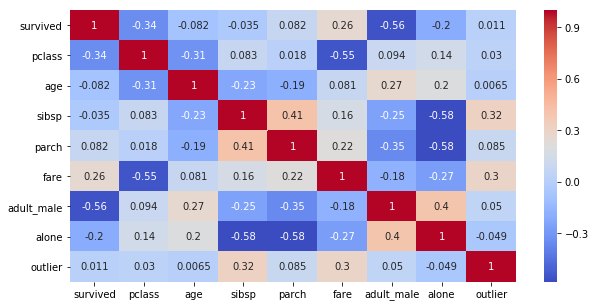

In [45]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot = True,cmap='coolwarm')

#### b. buatlah countplot seperti dibawah (style=whitegrid, palette=rainbow)

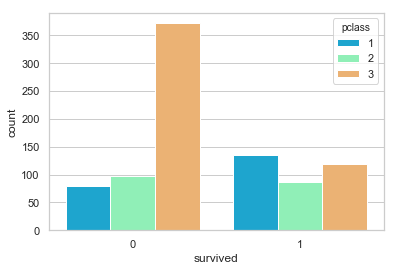

In [46]:
sns.set(style='whitegrid')
sns.countplot(x = 'survived', hue = 'pclass', data = df, palette='rainbow')

#### c. buatlah histogram age dibawah (color=darkred,bins=30)

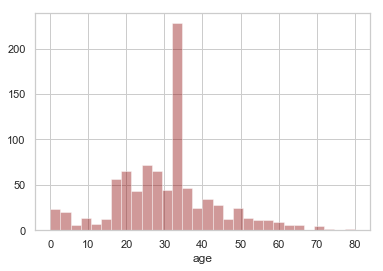

In [47]:
sns.distplot(df['age'], bins=30, kde=False, color='darkred');

### Answer

# Goodluck Guys!! Salam Bertasbih!
# Lanjut Dashboard Bertasbih